*   Author       : Eric Sia Siew Wei
*   Background   : Bachelor of Electrical & Electronics Engineering (Hons.), Universiti Teknologi PETRONAS (UTP)
*   Project      : Development of Object Tracking System on a RISC-V Embedded System Platform (StarFive VisionFive 2)
*   Subject      : Implementation of YOLOv8 (Pytorch & TensorRT) on
a RISC-V Embedded System Platform

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/EricSiaSiewWei/risc-v-object-tracking)
*   Instruction:







#**Step 1: GPU Availability Check**

*   Display information about the NVIDIA GPUs (Graphics Processing Units) installed on the system / notebook cell.
*   Information such as GPU model, driver version, GPU utilization, memory usage, temperature, and processes currently running on the GPU.
## Pro Tip: Use GPU Acceleration

If you are running this notebook in Google Colab, navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`. This will ensure your notebook uses a GPU, which will significantly speed up model training times.


In [ ]:
!nvidia-smi

Fri Jan 12 17:49:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#**Step 2: Clone the Github Repository**


*   Uses the git version control tool to clone a repository from the GitHub repository at *https://github.com/EricSiaSiewWei/risc-v-object-tracking.git*. This repository contains relevant source codes, data, or other files.



In [ ]:
%cd /content/
!git clone https://github.com/EricSiaSiewWei/risc-v-object-tracking.git
!pwd

/content
Cloning into 'risc-v-object-tracking'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 165 (delta 36), reused 139 (delta 31), pack-reused 6
Receiving objects: 100% (165/165), 36.10 MiB | 30.67 MiB/s, done.
Resolving deltas: 100% (37/37), done.
/content




> **Step 2.1**: Setting the Current Directory & Install all the Dependencies



**Base**
1.	hydra-core (version 1.2.0)
2.	matplotlib (version 3.2.2)
3.	numpy (version 1.18.5)
4.	opencv-python (version 4.1.1)
5.	Pillow (version 7.1.2)
6.	PyYAML (version 5.3.1)
7.	requests (version 2.23.0)
8.	scipy (version 1.4.1)
9.	torch (version 1.7.0)
10.	torchvision (version 0.8.1)
11.	tqdm (version 4.64.0)

**Logging**
1.	tensorboard (version 2.4.1)
Plotting
1. pandas (version 1.1.4)
2.	seaborn (version 0.11.0)

**Export**
1.	coremltools for CoreML export
2.	onnx for ONNX export
3.	tensorflow for TF exports
4.	openvino-dev for OpenVINO export

**Extras**
1.	ipython for interactive notebook
2.	psutil for system utilization
3.	thop (version 0.1.1) for FLOPs computation

**HUB**
1.	GitPython (version 3.1.24)


In [ ]:
%cd /content/risc-v-object-tracking/
!pip install -e '.[dev]'

/content/risc-v-object-tracking
Obtaining file:///content/risc-v-object-tracking
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py)


> **Step 2.2**: Importing the Dataset from the RoboFlow



There are a plethora of annotated dataset prepared by Roboflow community at Roboflow Universe. The dataset selected in this project is Pipeline Tracks Computer Vision Project created by UTP [18]. There are 681 annotated images for the training set, 188 raw images for the validation set and 94 images for the testing set. The dataset was downloaded in YOLOv8 format in the form of Python code. Users would need to paste the Python code snippet into the Google Colab notebook to train the custom pipe detector.

## Roboflow Universe

Need data for your project? Before spending time on annotating, check out Roboflow Universe, a repository of more than 110,000 open-source datasets that you can use in your projects. You'll find datasets containing everything from annotated cracks in concrete to plant images with disease annotations.


[![Roboflow Universe](https://media.roboflow.com/notebooks/template/uni-banner-frame.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672878480290)](https://universe.roboflow.com/)

@misc{ pipeline-tracks_dataset,
    title = { Pipeline tracks Dataset },
    type = { Open Source Dataset },
    author = { UTP },
    howpublished = { \url{ https://universe.roboflow.com/utp-jtbn5/pipeline-tracks } },
    url = { https://universe.roboflow.com/utp-jtbn5/pipeline-tracks },
    journal = { Roboflow Universe },
    publisher = { Roboflow },
    year = { 2023 },
    month = { nov },
    note = { visited on 2024-01-05 },
}


In [ ]:
%cd /content/risc-v-object-tracking/ultralytics/yolo/v8/detect

!pip install roboflow
!pip install fastapi
!pip install kaleido
!pip install python-multipart
!pip install uvicorn
!pip install lida==0.0.10


from roboflow import Roboflow
rf = Roboflow(api_key="OJqPtYIRgtBm2lkJzraM")
project = rf.workspace("utp-jtbn5").project("pipeline-tracks")
dataset = project.version(4).download("yolov8")

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.9.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that ar


Extracting Dataset Version Zip to Pipeline-tracks-4 in yolov8:: 100%|██████████| 1938/1938 [00:00<00:00, 3217.77it/s]


#**Step 3**: Download & Unzipping the DeepSORT Tracking Files

In [ ]:
%cd /content/risc-v-object-tracking/ultralytics/yolo/v8/detect
!gdown "https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t"
!unzip 'deep_sort_pytorch.zip'

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=11ZSZcG-bcbueXZC3rN08CM0qqX3eiHxf&confirm=t 

unzip:  cannot find or open deep_sort_pytorch.zip, deep_sort_pytorch.zip.zip or deep_sort_pytorch.zip.ZIP.


#**Step 4**: Training the Custom Model

In [ ]:
HOME = '/content/risc-v-object-tracking/ultralytics/yolo/v8/detect'

In [ ]:
%cd {HOME}

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect


In [ ]:
%cd {dataset.location}

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect/Pipeline-tracks-4


In [ ]:
%cd {HOME}

!python train.py model=yolov8n.pt data={dataset.location}/data.yaml epochs=50 imgsz=640

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect
Traceback (most recent call last):
  File "/content/risc-v-object-tracking/ultralytics/yolo/v8/detect/train.py", line 9, in <module>
    from ultralytics.nn.tasks import DetectionModel
  File "/content/risc-v-object-tracking/ultralytics/__init__.py", line 5, in <module>
    from ultralytics.hub import checks
  File "/content/risc-v-object-tracking/ultralytics/hub/__init__.py", line 15, in <module>
    from ultralytics.yolo.v8.detect import DetectionTrainer
  File "/content/risc-v-object-tracking/ultralytics/yolo/v8/detect/__init__.py", line 3, in <module>
    from .predict import DetectionPredictor, predict
  File "/content/risc-v-object-tracking/ultralytics/yolo/v8/detect/predict.py", line 19, in <module>
    from deep_sort_pytorch.utils.parser import get_config
ModuleNotFoundError: No module named 'deep_sort_pytorch'



> **Step 4.1**: Checking the Files inside the Train Folder


In [ ]:
!ls /content/risc-v-object-tracking/runs/detect/train

args.yaml					    R_curve.png		   val_batch0_pred.jpg
confusion_matrix.png				    results.csv		   val_batch1_labels.jpg
events.out.tfevents.1704423043.db2af1f82dc9.1745.0  results.png		   val_batch1_pred.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_labels.jpg
P_curve.png					    train_batch1.jpg	   val_batch2_pred.jpg
PR_curve.png					    train_batch2.jpg	   weights
predictions.json				    val_batch0_labels.jpg



> **Step 4.2**: Printing the Confusion Matrix

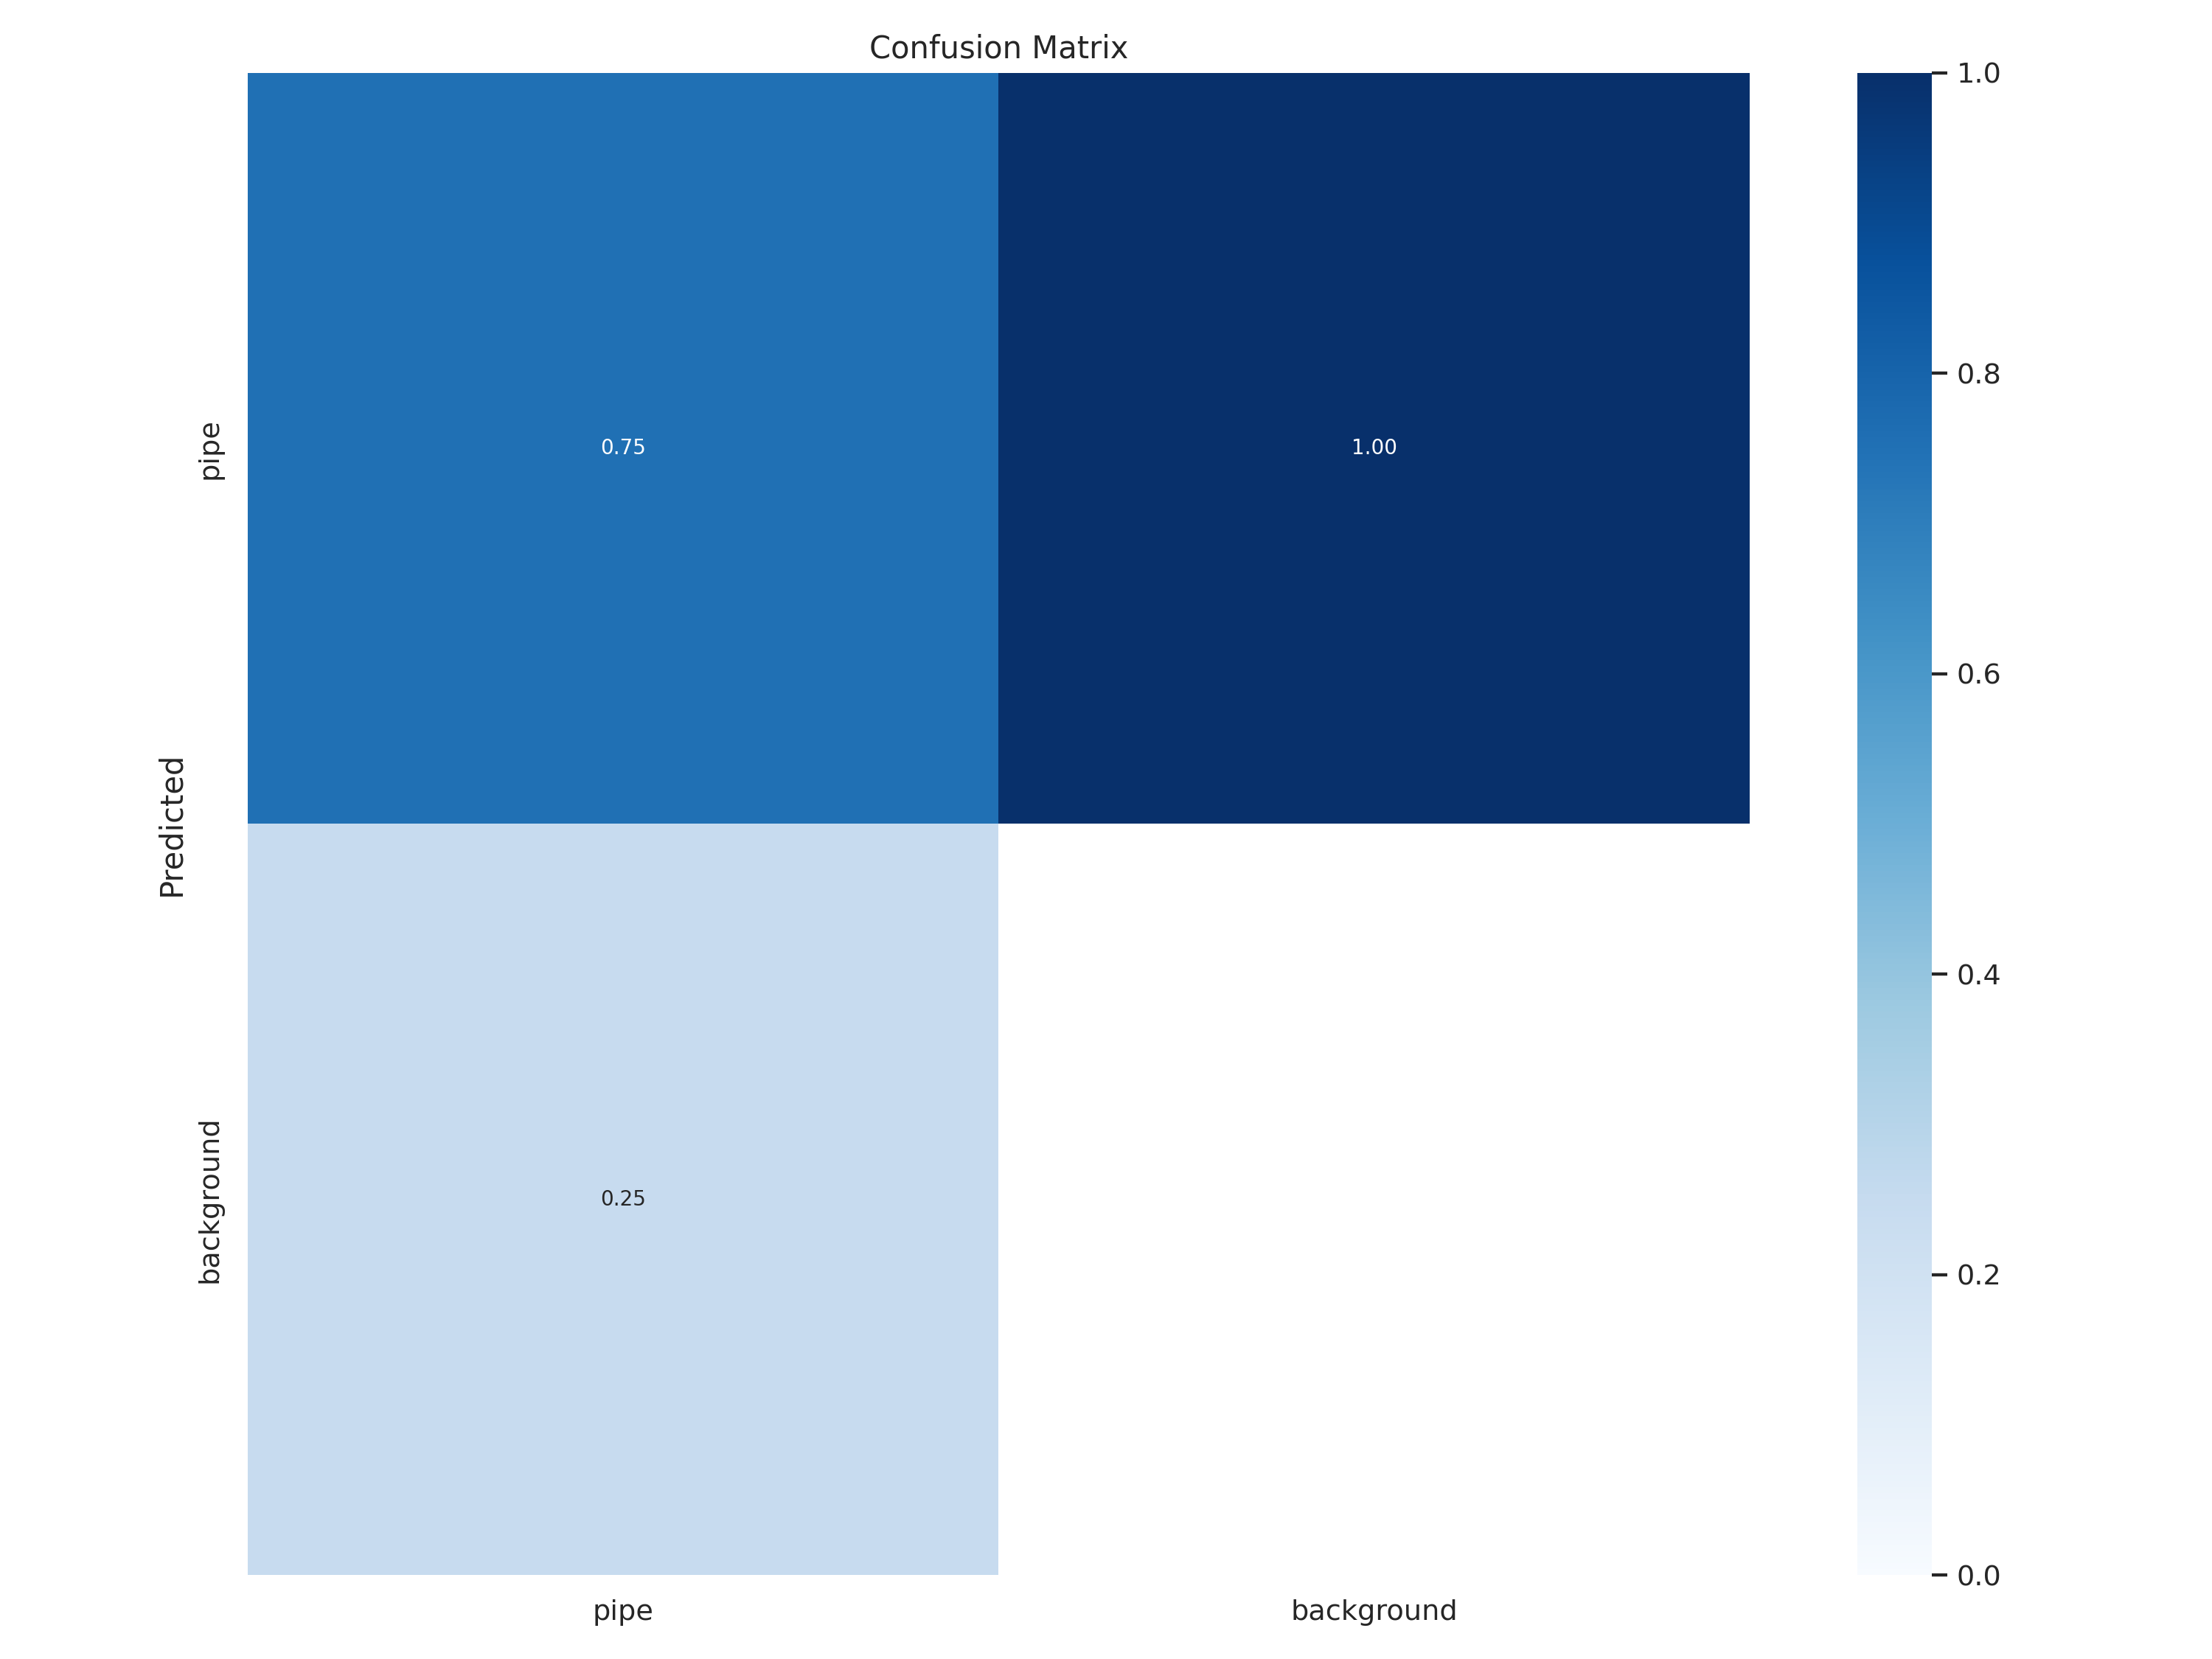

In [ ]:
from IPython.display import Image
Image(filename = '/content/risc-v-object-tracking/runs/detect/train/confusion_matrix.png')

> **Step 4.3**: Printing the Training and the Validation Loss

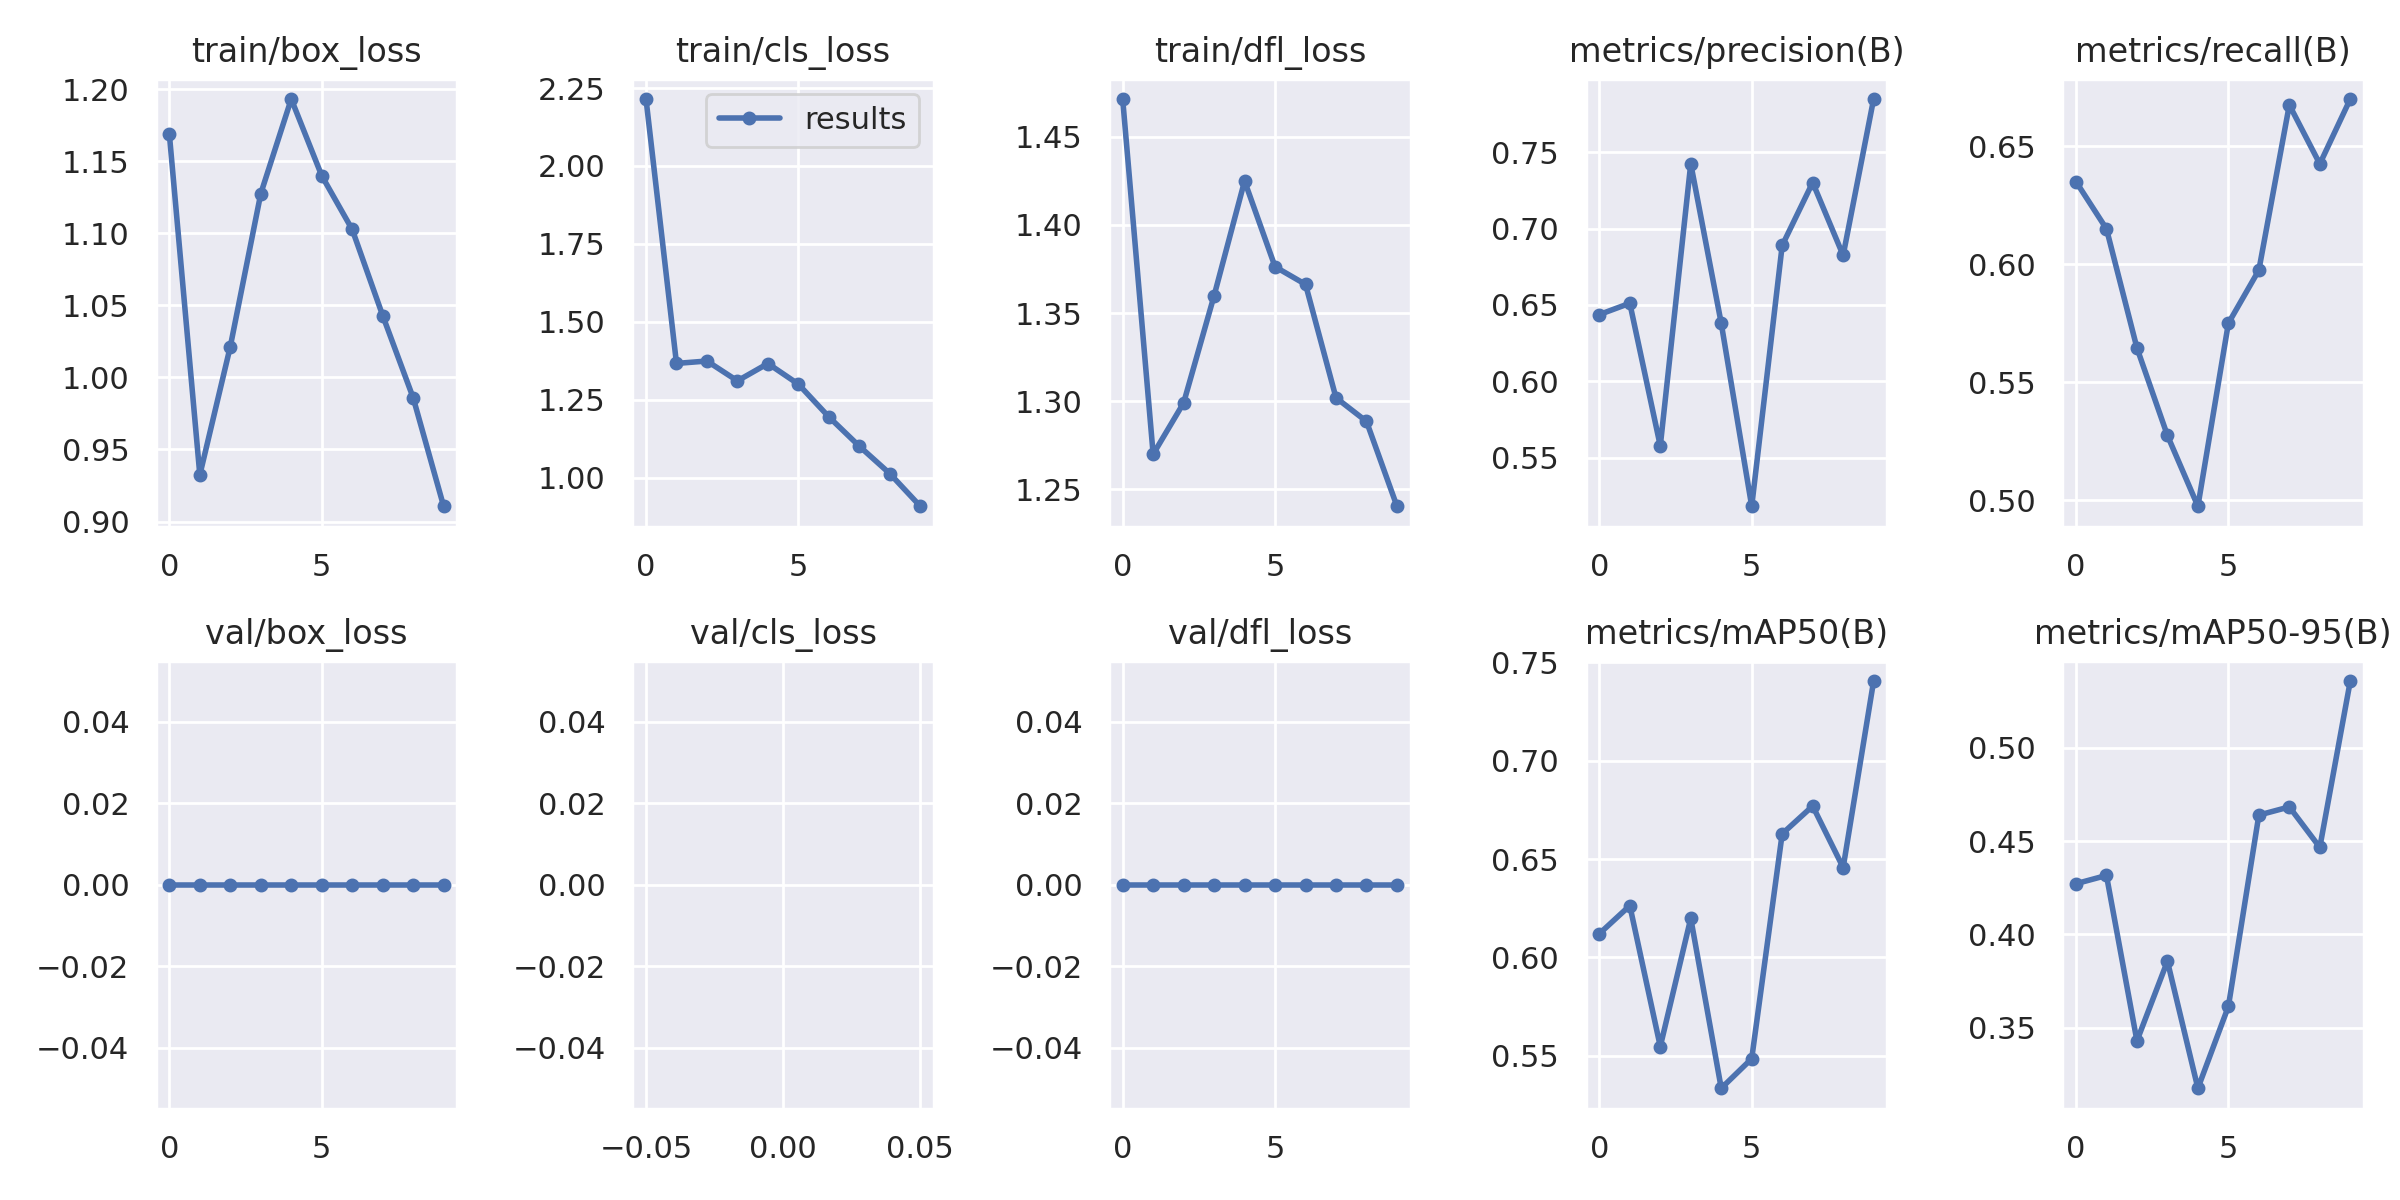

In [ ]:
Image(filename = r'/content/risc-v-object-tracking/runs/detect/train/results.png', width = 600)

> **Step 4.4**: Printing the Model Prediction on Validation Batch

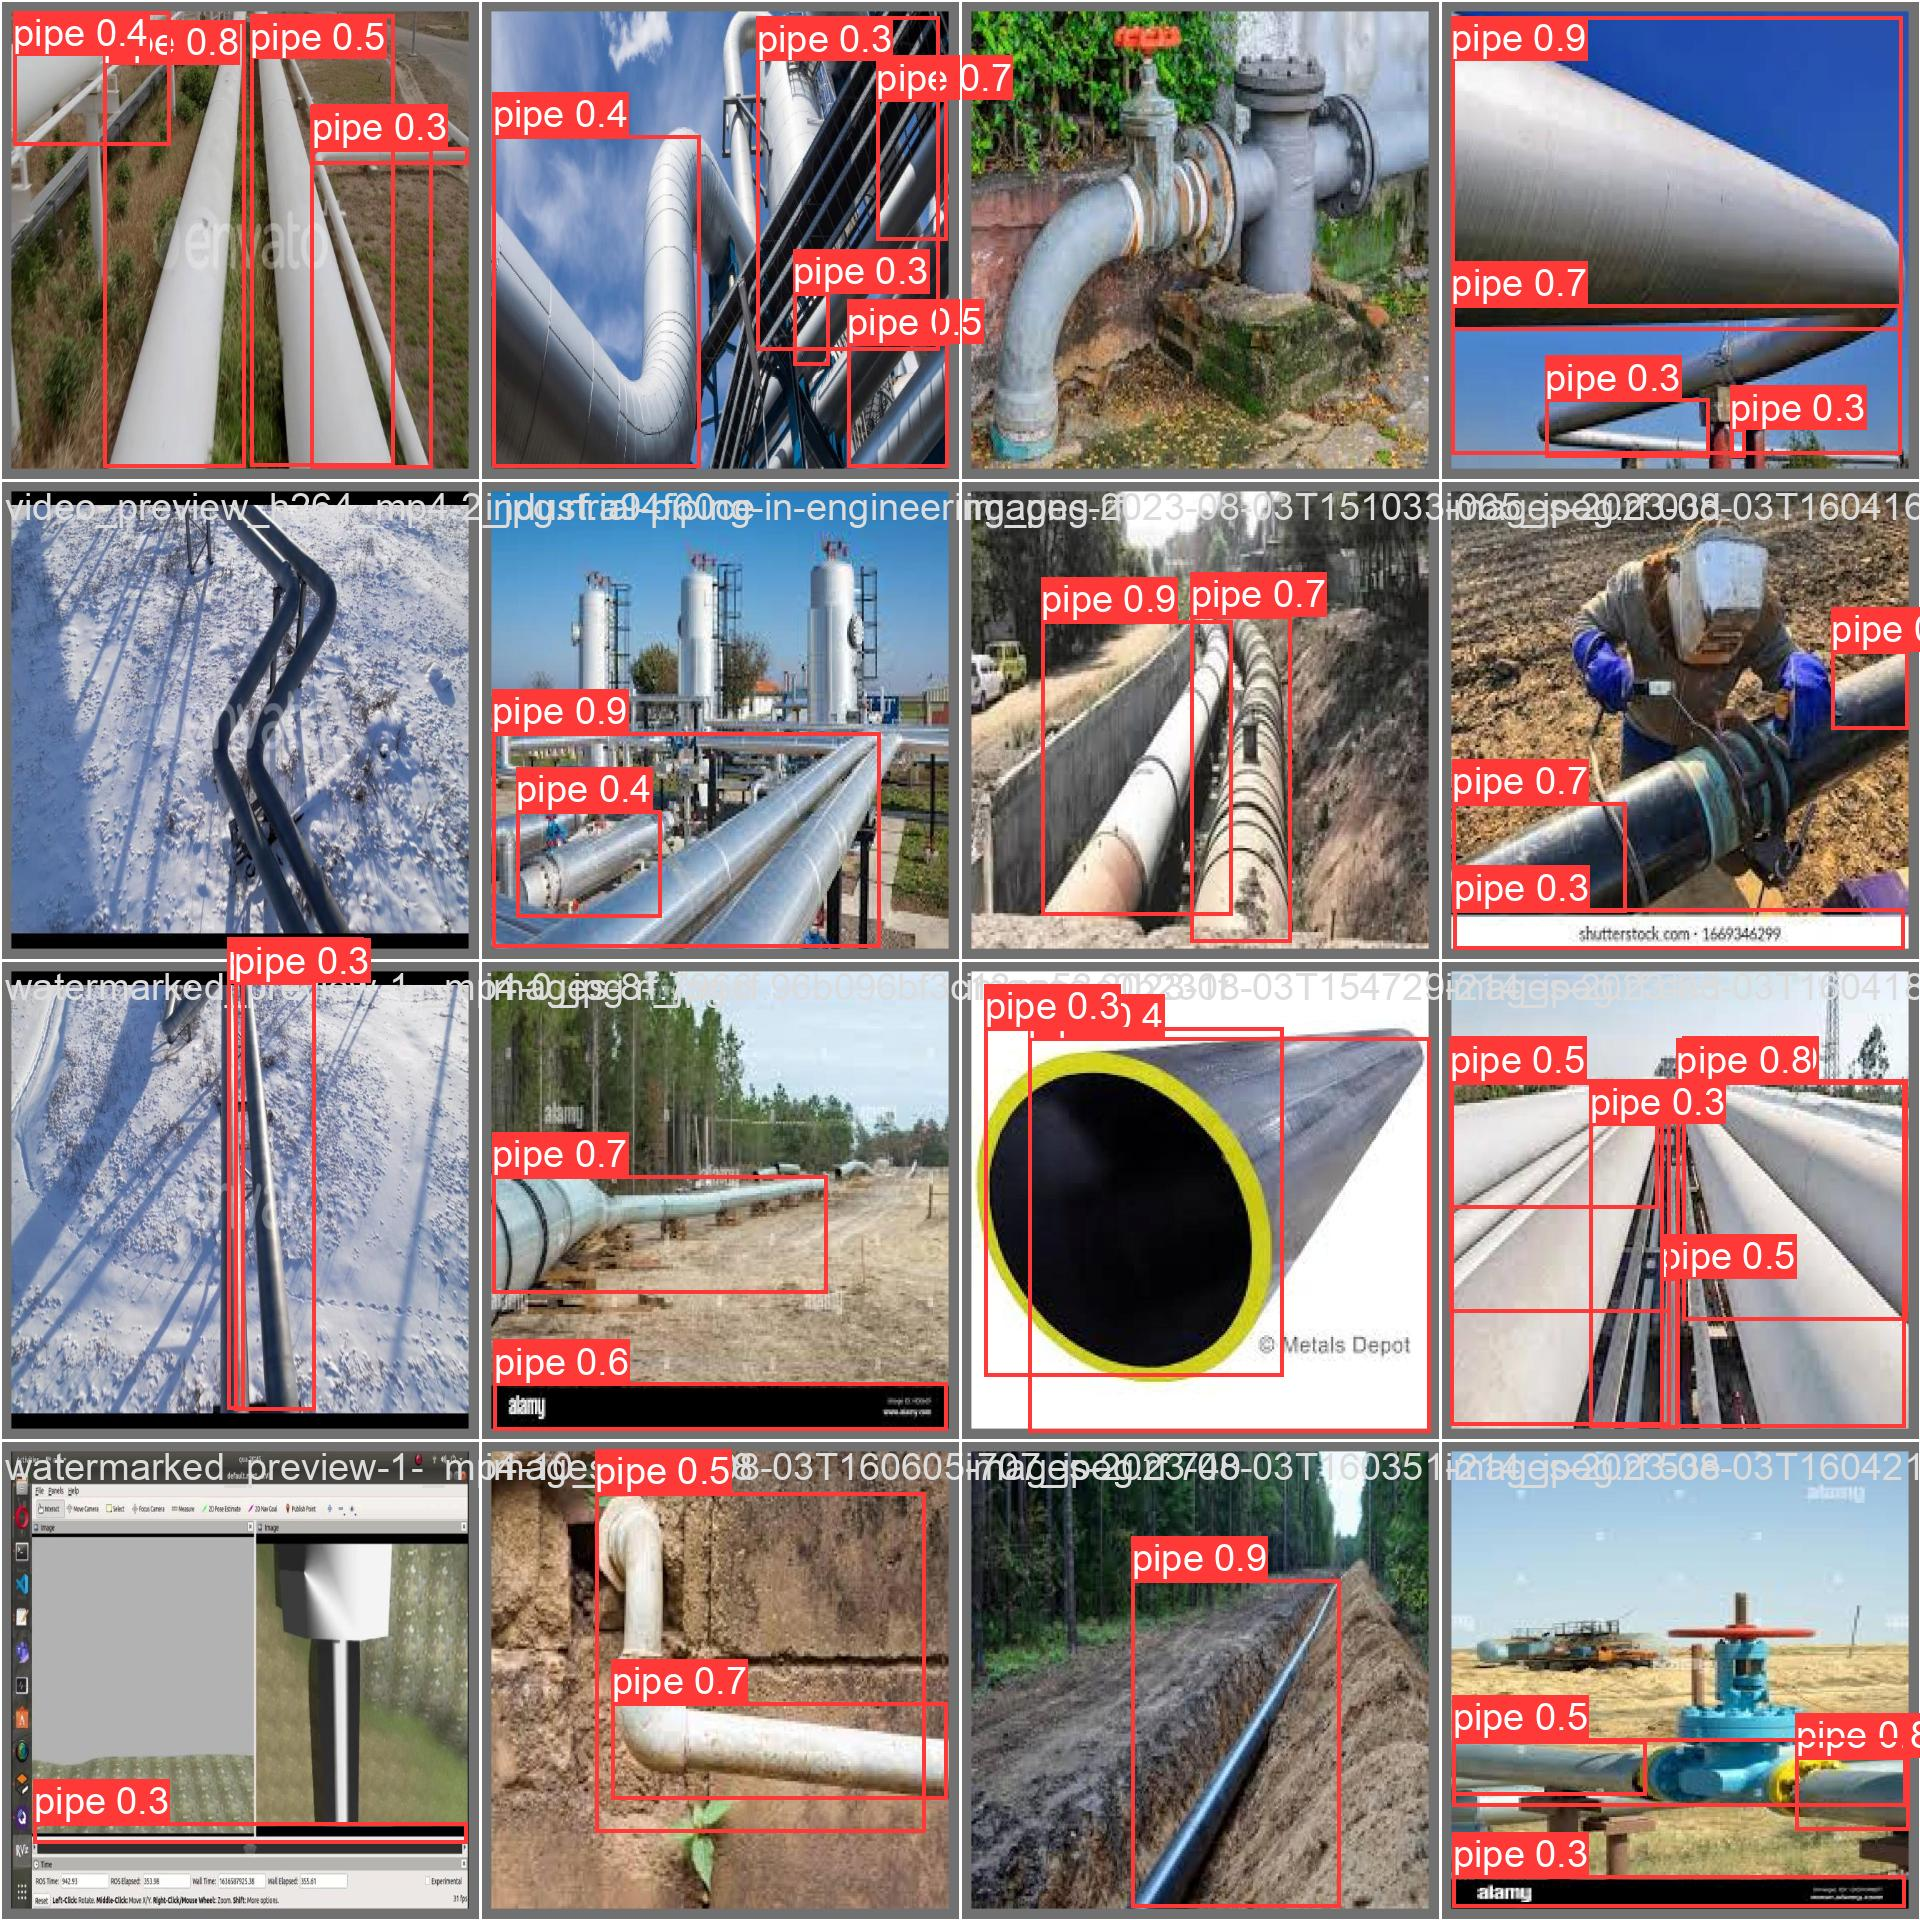

In [ ]:
Image(filename = r'/content/risc-v-object-tracking/runs/detect/train/val_batch2_pred.jpg', width =600)

#**Step 5**: Validate Custom Model

In [ ]:
!pwd

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect


In [ ]:
%cd /content/risc-v-object-tracking/runs/detect/train/weights/
import shutil

# Set the source and destination paths
source_path = '/content/risc-v-object-tracking/runs/detect/train/weights/best.pt'
destination_path = f'{HOME}/best.pt'

# Copy the file
shutil.copy(source_path, destination_path)

/content/risc-v-object-tracking/runs/detect/train/weights


'/content/risc-v-object-tracking/ultralytics/yolo/v8/detect/best.pt'

In [ ]:
%cd {HOME}
!python val.py model='best.pt' data={dataset.location}/data.yaml

/content/risc-v-object-tracking/ultralytics/yolo/v8/detect
2024-01-05 03:02:45.556731: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 03:02:45.556777: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 03:02:45.558058: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 03:02:46.692939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs
val:

#**Step 6**: Inference with Custom Model

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
import os
directories = [d for d in os.listdir() if os.path.isdir(d)]
print("Available Directories:")
print(directories)
os.chdir("/content/gdrive/MyDrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Available Directories:
['risc-v-object-tracking', 'yolov8-tensorrt', 'Colab Notebooks', 'yolov8-pytorch-tensorrt', 'yolov8-pytorch-versus-tensorrt', 'pytorch-versus-tensorrt', 'pytorch-tensorrt']


In [ ]:
!mkdir riscv-project
%cd riscv-project

/content/gdrive/MyDrive/riscv-project


In [ ]:
!cd /content/gdrive/MyDrive/riscv-project
%pip install --upgrade ultralytics

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.0/78.2 GB disk)


In [ ]:
import shutil
import os

source_path = '/content/risc-v-object-tracking/runs/detect/train/weights/best.pt'
destination_path = '/content/gdrive/MyDrive/riscv-project/best.pt'

# Check if the source file exists before copying
if os.path.exists(source_path):
    shutil.copy(source_path, destination_path)
    print("File copied successfully.")
else:
    print("Source file does not exist. Please check the path.")

File copied successfully.


In [ ]:
!pip install tensorrt
!pip install tensorrt_lean
!pip install tensorrt_dispatch
!pip install onnx onnxsim onnxruntime-gpu

  Using cached tensorrt-8.6.1.post1.tar.gz (18 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt: filename=tensorrt-8.6.1.post1-py2.py3-none-any.whl size=17283 sha256=1f7db481b2f5884625842dc6394e7979c75b0873b1a68fde0c18c6b8b9a55d5e
  Stored in directory: /root/.cache/pip/wheels/f4/c8/0e/b79b08e45752491b9acfdbd69e8a609e8b2ed7640dda5a3e59
Successfully built tensorrt
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt_lean: filename=tensorrt_lean-8.6.1.post1-py2.py3-none-any.whl size=17366 sha256=84b21de241bf0a4f1174c256e284cd125349a2bb3f701617dd9a438b7920e253
  Stored in directory: /root/.cache/pip/wheels/43/7a/dd/b7fc812743af81cd9d721aa79d8e0ddef650ef8c2ae4034dfe
Successfully built tensorrt_lean
  Using cached tensorrt_dispatch-8.6.1.post1.tar.gz (17 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tensorrt_dispatch: filename=tensorrt_dispatch-8.6.1.post1-py2.py3-none-any.whl size=17433 sha256=b4a7d32c2d7d0944d15c1201d268ea0128c4

In [ ]:
import tensorrt
print(tensorrt.__version__)
assert tensorrt.Builder(tensorrt.Logger())

8.6.1


In [ ]:
!yolo export model='best.pt' format=engine half=True device=0 workspace=12

Ultralytics YOLOv8.0.235 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (130.4 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 6.8s, saved as 'best.onnx' (130.1 MB)

TensorRT: starting export with TensorRT 8.6.1...
[01/05/2024-03:15:36] [TRT] [I] [MemUsageChange] Init CUDA: CPU +2, GPU +0, now: CPU 1013, GPU 1151 (MiB)
[01/05/2024-03:15:45] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +889, GPU +170, now: CPU 1978, GPU 1321 (MiB)
[01/05/2024-03:15:46] [TRT] [I] ----------------------------------------------------------------
[01/05/2024-03:15:46] [TRT] [I] Input filename:   best.onnx
[01/05/2024-03:15:46] [TRT] [I] ONNX IR version:  0.0.8
[01/05/2024-03:15:46] [TRT] [I] Opset version:    17
[01/05/2024-03:15:46] [TRT] [I] Producer name:    

In [ ]:
!gdown https://drive.google.com/uc?id=1RskX1wXVF0xSMAPgpkU-EsaUv8tD7lvS
!unzip modules.zip
!mkdir inference

Downloading...
From: https://drive.google.com/uc?id=1RskX1wXVF0xSMAPgpkU-EsaUv8tD7lvS
To: /content/gdrive/MyDrive/riscv-project/modules.zip
100% 5.39k/5.39k [00:00<00:00, 22.2MB/s]
Archive:  modules.zip
  inflating: modules/autobackend.py  
  inflating: modules/utils.py        



Video Youtube URL: https://www.youtube.com/watch?v=d_l3SdqlQ68&t=136s&ab_channel=X-Machines

In [ ]:
!gdown https://drive.google.com/uc?id=1GOfSd_OYpZJMAA5cZsoRDzBWxex3Ek01

Downloading...
From: https://drive.google.com/uc?id=1GOfSd_OYpZJMAA5cZsoRDzBWxex3Ek01
To: /content/gdrive/MyDrive/riscv-project/Pipe_Final.mp4
100% 66.1M/66.1M [00:00<00:00, 162MB/s]


In [ ]:
!mv Pipe_Final.mp4 inference/

In [ ]:
import torch  # best.pt based on PyTorch
import cv2
import random # Randomize the bounding box colour
import time
import pathlib  # Get File extension
from ultralytics import YOLO

import modules.utils as utils
from modules.autobackend import AutoBackend

def tensorrt_detection(model, source, image):
    # Preprocess the image before inference
    im = utils.preprocess(image)

    # Inference
    preds = model(im) # Detect presence of object

    # Post Process
    results = utils.postprocess(preds, im, image, model.names, source)  # Non maximum supression using the postprocess function from the utlis
    d = results[0].boxes

    # Get information from detection result
    tensor_size = d.cls.size()[0]
    if(tensor_size > 1):
        cls, conf, box = d.cls.squeeze(), d.conf.squeeze(), d.xyxy.squeeze()
    else:
        cls, conf, box = d.cls, d.conf, d.xyxy

    return cls, conf, box

def yolov8_detection(model, image):
    # Update object localizer
    results = model.predict(image, imgsz=640, conf=0.5, verbose=False)
    result = results[0].cpu()

    # Get information from result
    box = result.boxes.xyxy.numpy()
    conf = result.boxes.conf.numpy()
    cls = result.boxes.cls.numpy().astype(int)

    return cls, conf, box

def detection(model_path, source, name):
  # Check File Extension
  file_extension = pathlib.Path(model_path).suffix

  if(file_extension == ".engine"):
    model = AutoBackend(model_path, device=torch.device('cuda:0'), fp16=True)
    # Warmup
    model.warmup()
  else:
    model = YOLO(model_path)

  # Class Name and Colors
  label_map = model.names
  COLORS = [[random.randint(0, 255) for _ in range(3)] for _ in label_map]

  # FPS Detection
  frame_count = 0
  total_fps = 0
  avg_fps = 0

  # FPS Video
  video_cap = cv2.VideoCapture(source)

  total_frames = int(video_cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frame_width = int(video_cap.get(3))
  frame_height = int(video_cap.get(4))

  video_frames = []

  while video_cap.isOpened():
      ret, frame = video_cap.read()
      if not ret:
          break

      # # Start Time
      start = time.time()

      # Detection
      if(file_extension == ".engine"):
        cls, conf, box = tensorrt_detection(model, source, frame)
      else:
        cls, conf, box = yolov8_detection(model, frame)

      # Pack together for easy use
      detection_output = list(zip(cls, conf, box))
      image_output = utils.draw_box(frame, detection_output, label_map, COLORS)

      end = time.time()
      # # End Time

      # Draw FPS
      frame_count += 1
      fps = 1 / (end - start)
      total_fps = total_fps + fps
      avg_fps = total_fps / frame_count

      image_output = utils.draw_fps(avg_fps, image_output)

      video_frames.append(image_output)

      print("(%2d / %2d) Frames Processed" % (frame_count, total_frames))

  print(avg_fps)

  file_name = utils.get_name(source)
  folder_name = name
  save_path = utils.get_save_path(file_name, folder_name)
  out = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*'XVID'), int(avg_fps), (frame_width, frame_height))

  for frame in video_frames:
      out.write(frame)

  out.release()

  print("Video is saved in: "+save_path)

In [ ]:
detection("best.engine", "inference/Pipe_Final.mp4", "detection-yolov8-TensorRT")

Loading best.engine for TensorRT inference...
( 1 / 2202) Frames Processed
( 2 / 2202) Frames Processed
( 3 / 2202) Frames Processed
( 4 / 2202) Frames Processed
( 5 / 2202) Frames Processed
( 6 / 2202) Frames Processed
( 7 / 2202) Frames Processed
( 8 / 2202) Frames Processed
( 9 / 2202) Frames Processed
(10 / 2202) Frames Processed
(11 / 2202) Frames Processed
(12 / 2202) Frames Processed
(13 / 2202) Frames Processed
(14 / 2202) Frames Processed
(15 / 2202) Frames Processed
(16 / 2202) Frames Processed
(17 / 2202) Frames Processed
(18 / 2202) Frames Processed
(19 / 2202) Frames Processed
(20 / 2202) Frames Processed
(21 / 2202) Frames Processed
(22 / 2202) Frames Processed
(23 / 2202) Frames Processed
(24 / 2202) Frames Processed
(25 / 2202) Frames Processed
(26 / 2202) Frames Processed
(27 / 2202) Frames Processed
(28 / 2202) Frames Processed
(29 / 2202) Frames Processed
(30 / 2202) Frames Processed
(31 / 2202) Frames Processed
(32 / 2202) Frames Processed
(33 / 2202) Frames Process

In [ ]:
import shutil
from IPython.display import HTML
from base64 import b64encode

# Source video path
source_video_path = 'result/detection-yolov8-TensorRT/Pipe_Final.mp4'

# Destination video path
destination_video_path = '/content/copied_video.mp4'

# Copy the video file
shutil.copy(source_video_path, destination_video_path)

# Function to re-encode video
def reencode_video(input_path, output_path):
    !ffmpeg -i "{input_path}" -c:v libx264 -c:a aac -strict experimental -b:a 192k -movflags faststart "{output_path}"

# Re-encode the copied video
reencode_video(destination_video_path, '/content/copied_video_reencoded.mp4')

# Function to display video in Colab
def display_video(path):
    video_file = open(path, 'rb').read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    return HTML(f'<video width="640" height="480" controls><source src="{video_url}" type="video/mp4"></video>')

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Display the re-encoded video
display_video('/content/copied_video_reencoded.mp4')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
detection("best.pt", "inference/Pipe_Final.mp4", "detection-yolov8")

( 1 / 2202) Frames Processed
( 2 / 2202) Frames Processed
( 3 / 2202) Frames Processed
( 4 / 2202) Frames Processed
( 5 / 2202) Frames Processed
( 6 / 2202) Frames Processed
( 7 / 2202) Frames Processed
( 8 / 2202) Frames Processed
( 9 / 2202) Frames Processed
(10 / 2202) Frames Processed
(11 / 2202) Frames Processed
(12 / 2202) Frames Processed
(13 / 2202) Frames Processed
(14 / 2202) Frames Processed
(15 / 2202) Frames Processed
(16 / 2202) Frames Processed
(17 / 2202) Frames Processed
(18 / 2202) Frames Processed
(19 / 2202) Frames Processed
(20 / 2202) Frames Processed
(21 / 2202) Frames Processed
(22 / 2202) Frames Processed
(23 / 2202) Frames Processed
(24 / 2202) Frames Processed
(25 / 2202) Frames Processed
(26 / 2202) Frames Processed
(27 / 2202) Frames Processed
(28 / 2202) Frames Processed
(29 / 2202) Frames Processed
(30 / 2202) Frames Processed
(31 / 2202) Frames Processed
(32 / 2202) Frames Processed
(33 / 2202) Frames Processed
(34 / 2202) Frames Processed
(35 / 2202) Fr

In [ ]:
import shutil
from IPython.display import HTML
from base64 import b64encode

# Source video path
source_video_path = 'result/detection-yolov8/Pipe_Final.mp4'

# Destination video path
destination_video_path = '/content/copied_video2.mp4'

# Copy the video file
shutil.copy(source_video_path, destination_video_path)

# Function to re-encode video
def reencode_video(input_path, output_path):
    !ffmpeg -i "{input_path}" -c:v libx264 -c:a aac -strict experimental -b:a 192k -movflags faststart "{output_path}"

# Re-encode the copied video
reencode_video(destination_video_path, '/content/copied_video_reencoded2.mp4')

# Function to display video in Colab
def display_video(path):
    video_file = open(path, 'rb').read()
    video_url = "data:video/mp4;base64," + b64encode(video_file).decode()
    return HTML(f'<video width="640" height="480" controls><source src="{video_url}" type="video/mp4"></video>')

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
# Display the re-encoded video
display_video('/content/copied_video_reencoded2.mp4')

Output hidden; open in https://colab.research.google.com to view.